In [1]:
from keras.applications.densenet import DenseNet169
import keras as K
from keras import initializers
import pandas as pd

from keras.layers import Flatten, Dropout, Dense
from keras import models
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns

from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import precision_recall_fscore_support

import numpy as np 
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [2]:
# Load data

data = np.load(r"D:\Programming\Python\Data\Msc_project_data\CNN model compare\data\x_train_image.npz")
x_train_image = data['a']
data.close()
data = np.load(r"D:\Programming\Python\Data\Msc_project_data\CNN model compare\data\x_test_image.npz")
x_test_image = data['a']
data.close()
data = np.load(r"D:\Programming\Python\Data\Msc_project_data\CNN model compare\data\x_val_image.npz")
x_val_image = data['a']
data.close()
data = np.load(r"D:\Programming\Python\Data\Msc_project_data\CNN model compare\data\y_train_label.npz")
y_train_label = data['a']
data.close()
data = np.load(r"D:\Programming\Python\Data\Msc_project_data\CNN model compare\data\y_test_label.npz")
y_test_label = data['a']
data.close()
data = np.load(r"D:\Programming\Python\Data\Msc_project_data\CNN model compare\data\y_val_label.npz")
y_val_label = data['a']
data.close()
data = np.load(r"D:\Programming\Python\Data\Msc_project_data\CNN model compare\data\y_train_label_cat.npz")
y_train_label_cat = data['a']
data.close()
data = np.load(r"D:\Programming\Python\Data\Msc_project_data\CNN model compare\data\y_test_label_cat.npz")
y_test_label_cat = data['a']
data.close()
data = np.load(r"D:\Programming\Python\Data\Msc_project_data\CNN model compare\data\y_val_label_cat.npz")
y_val_label_cat = data['a']
data.close()

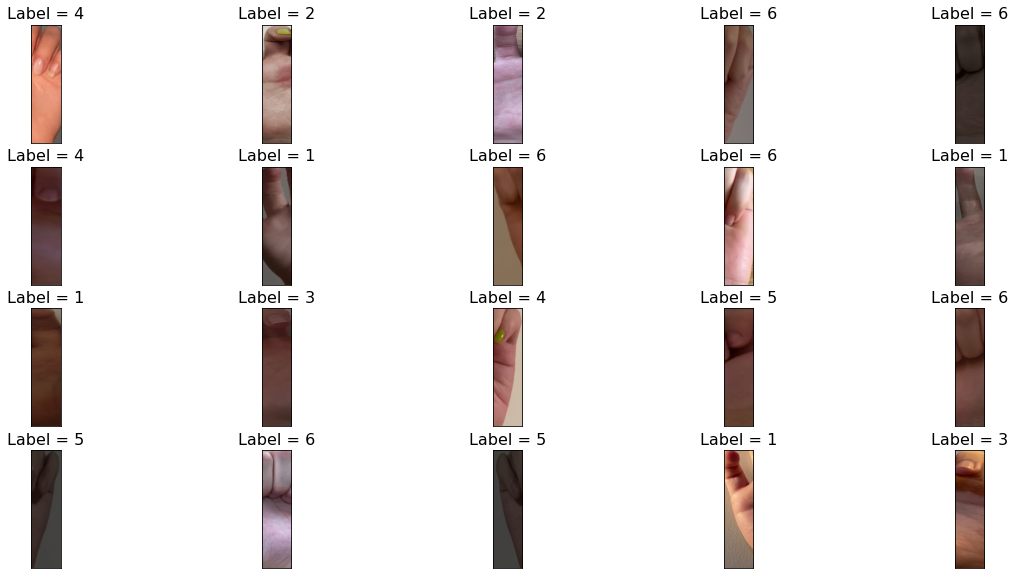

In [3]:
# show loaded data
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_image[i])
    plt.title("Label = " + str(y_train_label[i]+1), size = 16)
plt.show()


In [9]:
# Feature extractor
feature_extractor = DenseNet169(weights = "imagenet", include_top=False, input_shape=(512, 128,3))

feature_CNN = feature_extractor.predict(x_train_image)
feature_CNN = feature_CNN.reshape(feature_CNN.shape[0], -1)


103/103 [==============================] - 255s 2s/step


In [10]:
feature_CNN.shape

(3282, 106496)

In [12]:
# Train RF model
X_for_RF = feature_CNN

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
RF_model.fit(X_for_RF, y_train_label) #For sklearn no one hot encoding


RandomForestClassifier(n_estimators=50, random_state=42)

In [14]:
# Test

feature_CNN = feature_extractor.predict(x_test_image)
feature_CNN = feature_CNN.reshape(feature_CNN.shape[0], -1)
X_for_RF = feature_CNN

#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_for_RF)


26/26 [==============================] - 67s 3s/step


Accuracy =  0.8587088915956151
[[146   7   0   0   0   0]
 [ 12 138   7   1   0   0]
 [  0  21 110   3   1   0]
 [  0   0  18  91   6   3]
 [  0   0   2  16 105   5]
 [  0   0   0   2  12 115]]


<AxesSubplot:>

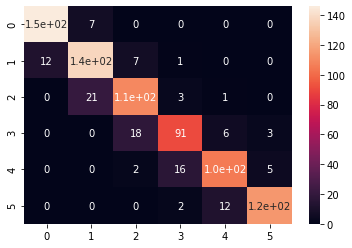

In [16]:
import seaborn as sns
from sklearn import metrics

print ("Accuracy = ", metrics.accuracy_score(y_test_label, prediction_RF))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_label, prediction_RF)
print(cm)
sns.heatmap(cm, annot=True)
